In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import WeibullAFTFitter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv("kickstarter_1.csv")

# Display
df.head()

,day_succ,Status,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,usr_net_bic,1f_plg,1f_bck,1prj_prom,2f_plg,2f_bck,2prj_prom,3f_plg,3f_bck,3prj_prom
0,1,1,1,0,0,0,0,0,0,0,...,0.000000,9.994073,0.046648,0.000000,15.163901,0.073328,0.000000,15.247005,0.107104,0.000000
1,1,1,1,0,0,0,0,0,0,0,...,0.000000,1.997137,-0.083354,0.000000,1.544977,-0.102276,0.000000,1.284910,-0.113991,0.000000
2,1,1,0,0,0,0,1,0,0,0,...,0.470316,2.636237,1.668257,1.000264,2.439467,1.387848,1.732227,2.252687,1.229586,0.580395
3,1,1,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,1,0,0,0,0,1,0,0,0,...,-0.260923,1.587458,0.197177,-0.265049,1.179622,0.103431,-0.280888,1.013062,0.068837,-0.258752


In [5]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   day_succ                    4175 non-null   int64  
 1   Status                      4175 non-null   int64  
 2   cat1                        4175 non-null   int64  
 3   cat2                        4175 non-null   int64  
 4   cat3                        4175 non-null   int64  
 5   cat4                        4175 non-null   int64  
 6   cat5                        4175 non-null   int64  
 7   cat6                        4175 non-null   int64  
 8   cat7                        4175 non-null   int64  
 9   cat8                        4175 non-null   int64  
 10  cat9                        4175 non-null   int64  
 11  cat10                       4175 non-null   int64  
 12  cat11                       4175 non-null   int64  
 13  cat12                       4175 

In [11]:
# Convert data type
int64_cols = df.select_dtypes(include='int64').columns

# Print list
print("Converted feature:")
print(int64_cols.tolist())

# Convert to category
df[int64_cols] = df[int64_cols].astype('category')

Converted feature:
['day_succ', 'Status', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'curr1', 'curr2', 'curr3', 'curr4', 'curr5', 'curr6', 'facebook_connected', 'has_video']


In [13]:
# Convert data type of day_succ feature
df['day_succ'] =  df['day_succ'].astype('int64')

In [15]:
# Re-check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   day_succ                    4175 non-null   int64   
 1   Status                      4175 non-null   category
 2   cat1                        4175 non-null   category
 3   cat2                        4175 non-null   category
 4   cat3                        4175 non-null   category
 5   cat4                        4175 non-null   category
 6   cat5                        4175 non-null   category
 7   cat6                        4175 non-null   category
 8   cat7                        4175 non-null   category
 9   cat8                        4175 non-null   category
 10  cat9                        4175 non-null   category
 11  cat10                       4175 non-null   category
 12  cat11                       4175 non-null   category
 13  cat12             

In [24]:
# Specify time to event and event feature
T = df['day_succ']  
E = df['Status']   

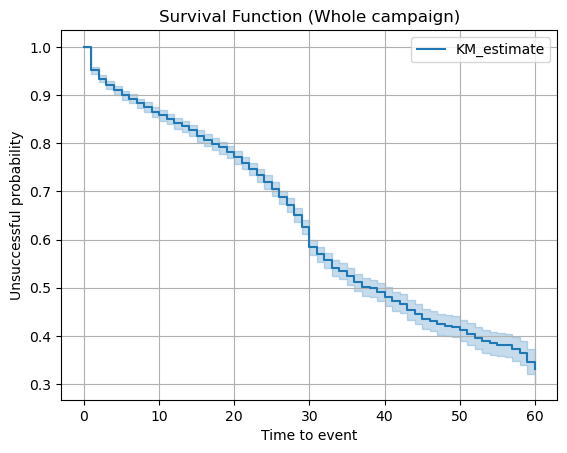

In [28]:
# Use KaplanMeier estimator
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

# Plot Survival Curve
kmf.plot_survival_function()
plt.title("Survival Function (Whole campaign)")
plt.xlabel("Time to event")
plt.ylabel("Unsuccessful probability")
plt.grid()
plt.show()

In [35]:
# Create copy of dataset
df_cox = df.copy()

In [49]:
# Weibull distribution

aft = WeibullAFTFitter()

# Fit model
aft.fit(df_cox, duration_col='day_succ', event_col='Status')

# Result
aft.print_summary()

/opt/anaconda3/lib/python3.12/site-packages/lifelines/fitters/__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


<lifelines.WeibullAFTFitter: fitted with 4175 total observations, 2213 right-censored observations>
             duration col = 'day_succ'
                event col = 'Status'
   number of observations = 4175
number of events observed = 1962
           log-likelihood = -8630.52
         time fit was run = 2025-07-18 12:26:14 UTC

---
                                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                   
lambda_ 1f_bck                     -1.25      0.29      0.14           -1.52           -0.98                0.22                0.38
        1f_plg                     -0.14      0.87      0.03           -0.20           -0.07                0.82                0.93
        1prj_prom                  -0.01      0.99      0.03           -0.08            0.06                0.93                1.06
        2f_bck                      1.45      4.28      0.21            1.03            1.87                2.81                6.51
        2f_plg                      0.38      1.47      0.07            0.24            0.53                1.27                1.70
        2prj_prom                   0.03      1.03      0.03           -0.03            0.09                0.97                1.09
        3f_bck                     -0.31      0.73      0.17           -0.65            0.03                0.52                1.03
        3f_plg                     -0.39      0.68      0.06           -0.50           -0.28                0.61                0.76
        3prj_prom                   0.00      1.00      0.03           -0.06            0.06                0.94                1.06
        backers                    -0.18      0.84      0.04           -0.25           -0.10                0.78                0.90
        cat1                        0.96      2.62      0.05            0.86            1.06                2.37                2.90
        cat10                       1.28      3.60      0.36            0.59            1.98                1.80                7.23
        cat11                       1.06      2.88      0.05            0.95            1.16                2.59                3.20
        cat12                       0.66      1.94      0.07            0.52            0.81                1.68                2.24
        cat13                       1.37      3.93      0.18            1.01            1.73                2.74                5.65
        cat14                       1.05      2.86      0.08            0.90            1.20                2.46                3.32
        cat15                       0.88      2.41      0.12            0.65            1.11                1.92                3.02
        cat2                        0.78      2.19      0.03            0.72            0.85                2.06                2.33
        cat3                        1.17      3.22      0.07            1.03            1.31                2.81                3.70
        cat4                        1.21      3.36      0.05            1.12            1.31                3.06                3.69
        cat5                        0.91      2.47      0.05            0.80            1.01                2.23                2.74
        cat6                        0.95      2.58      0.08            0.79            1.10                2.21                3.01
        cat7                        1.07      2.92      0.10            0.88            1.27                2.40                3.56
        cat8                        0.95      2.58      0.07            0.81            1.08                2.26                2.95
        cat9                        0.77      2.16      0.04            0.70            0.84                2.01                2.32
        comments                    0.16      1.18      0.03            0

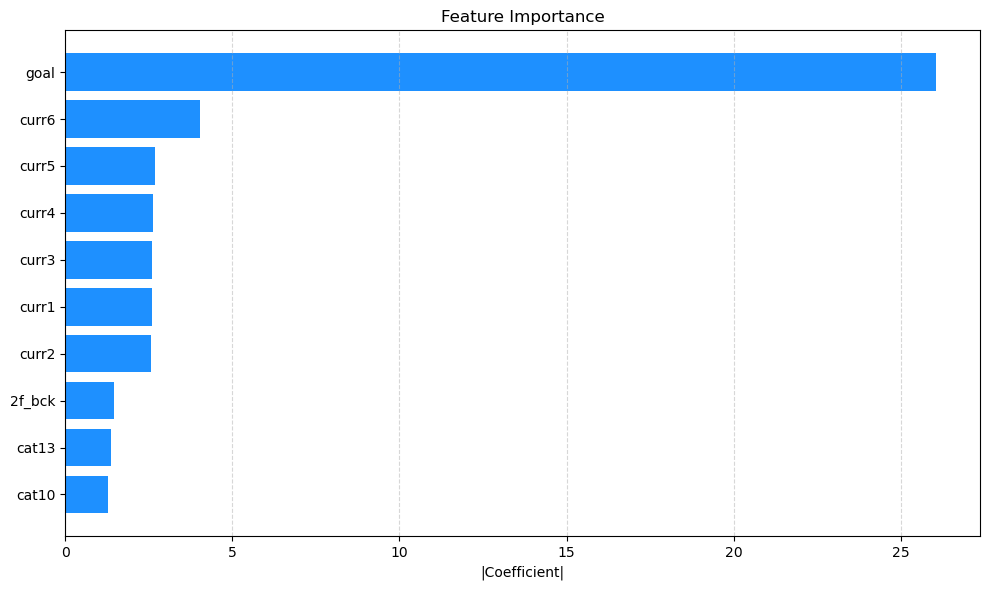

In [71]:
aft_summary = aft.summary
aft_lambda = aft_summary.loc['lambda_'].copy()

# Filter feature with p-value < 0.05
significant_vars = aft_lambda[aft_lambda['p'] < 0.05].copy()

# Get absolute coefficient
significant_vars['abs_coef'] = significant_vars['coef'].abs()

# Sort
significant_vars = significant_vars.sort_values(by='abs_coef', ascending=False)

# Top 10 features
top_10 = significant_vars.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    top_10.index,
    top_10['abs_coef'],
    color='dodgerblue'
)
plt.xlabel('Abssolute coefficient')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [77]:
# category variable

# Get lambda from AFT model
aft_lambda = aft.summary.loc['lambda_'].copy()

# Get category dummy variable
cat_vars = aft_lambda[aft_lambda.index.str.contains("cat")].copy()

# Get coefficient
cat_vars['abs_coef'] = cat_vars['coef'].abs()

# Rename dummies
category_labels = {
    'cat1': 'Art',
    'cat2': 'Comics',
    'cat3': 'Crafts',
    'cat4': 'Dance',
    'cat5': 'Design',
    'cat6': 'Fashion',
    'cat7': 'Film & Video',
    'cat8': 'Food',
    'cat9': 'Games',
    'cat10': 'Journalism',
    'cat11': 'Music',
    'cat12': 'Photography',
    'cat13': 'Publishing',
    'cat14': 'Technology',
    'cat15': 'Theater',
}

cat_vars.rename(index=category_labels, inplace=True)

# Sort
cat_vars = cat_vars.sort_values(by='abs_coef', ascending=False)

# Display
print(cat_vars[['coef', 'p', 'abs_coef']])


                  coef              p  abs_coef
covariate                                      
Publishing    1.369476   1.184398e-13  1.369476
Journalism    1.281734   3.111110e-04  1.281734
Dance         1.212275  4.854699e-143  1.212275
Crafts        1.169838   1.082298e-62  1.169838
Film & Video  1.072724   1.176613e-26  1.072724
Music         1.056474   1.535673e-84  1.056474
Technology    1.049268   1.193777e-42  1.049268
Art           0.963490   8.295671e-79  0.963490
Food          0.947423   5.664635e-44  0.947423
Fashion       0.946259   3.396010e-33  0.946259
Design        0.906121   1.897692e-67  0.906121
Theater       0.879445   2.698475e-14  0.879445
Comics        0.784167  5.557105e-132  0.784167
Games         0.770717  6.266410e-103  0.770717
Photography   0.663665   7.645199e-20  0.663665


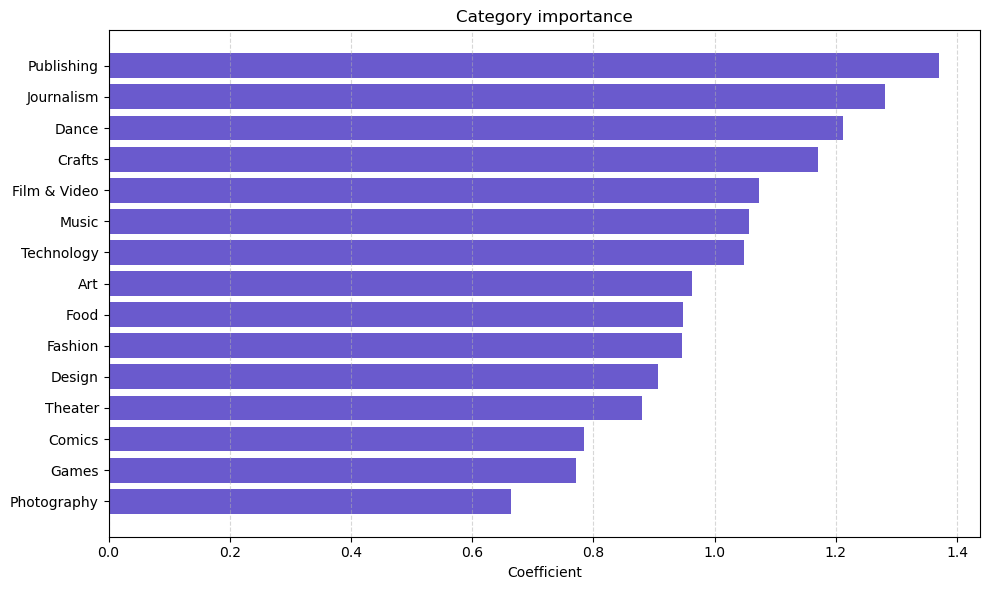

In [81]:
# Visualize

plt.figure(figsize=(10, 6))
plt.barh(cat_vars.index, cat_vars['abs_coef'], color='slateblue')
plt.xlabel('Coefficient')
plt.title('Category importance')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [91]:
# Currency variable


# Get currency variable
curr_df = aft_lambda[aft_lambda.index.str.startswith("curr")].copy()

# Get coefficient
curr_df["abs_coef"] = curr_df["coef"].abs()

# Rename currency
currency_map = {
    "curr1": "AUD",
    "curr2": "CAD",
    "curr3": "EUR",
    "curr4": "GBP",
    "curr5": "NZD",
    "curr6": "USD"
}
curr_df["currency"] = curr_df.index.map(currency_map)

# Sort
curr_df = curr_df.sort_values(by="abs_coef", ascending=False)

# Display
print(curr_df[['coef', 'p', 'abs_coef']])

               coef              p  abs_coef
covariate                                   
curr6      4.029418   0.000000e+00  4.029418
curr5      2.672428   5.590277e-38  2.672428
curr4      2.618362  1.809549e-147  2.618362
curr3      2.593231  4.187058e-298  2.593231
curr1      2.582499   0.000000e+00  2.582499
curr2      2.572433   0.000000e+00  2.572433


/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_52269/1574870924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coef", y="currency", data=curr_df, palette="coolwarm")


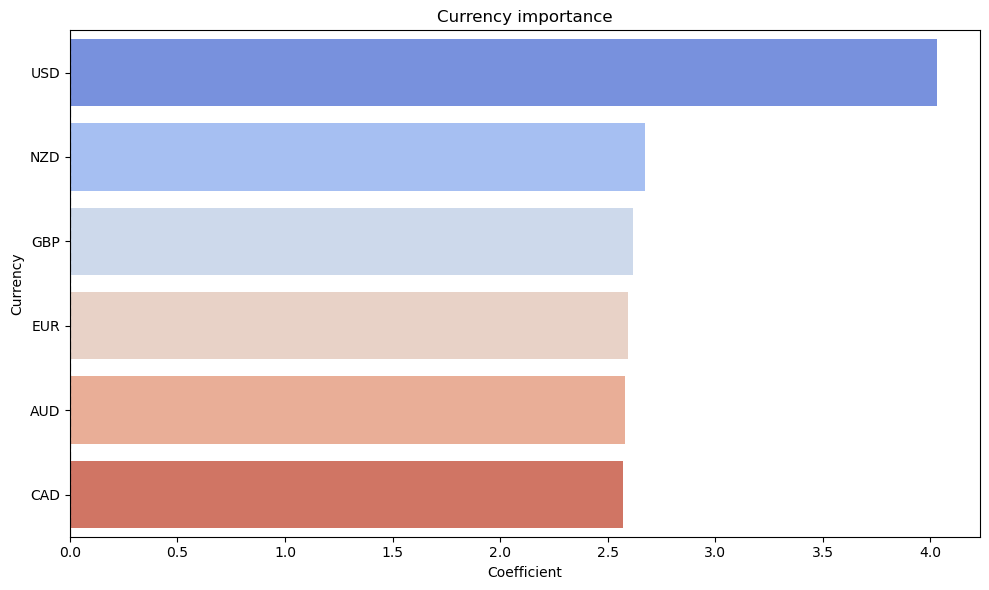

In [93]:
# Visualize

plt.figure(figsize=(10, 6))
sns.barplot(x="coef", y="currency", data=curr_df, palette="coolwarm")
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Currency importance")
plt.xlabel("Coefficient")
plt.ylabel("Currency")
plt.tight_layout()
plt.show()

In [119]:
# Core campaign stats

feature_map = {
    "goal": "Funding target",
    "pledged": "Total pledged",
    "backers": "Number of backers",
    "duration": "Campaign length (days)",
    "updates": "Creator updates",
    "comments": "Backer comments",
    "rewards": "Reward tiers",
    "videos": "Number of embedded videos",
    "images": "Number of images",
    "words_description": "Description word count",
    "words_risks_and_challenges": "Risks & challenges word count",
    "faqs": "Number of FAQs"
}



In [121]:
# Features
selected_features = list(feature_map.keys())

# Filter
selected_df = aft_lambda.loc[selected_features].copy()

# Get coefficient
selected_df["Feature"] = selected_df.index.map(feature_map)

# Sort
selected_df = selected_df.sort_values(by="coef", ascending=False)

# Display
print(selected_df['coef'])

covariate
goal                          26.069288
duration                       0.372828
comments                       0.163328
words_risks_and_challenges     0.042932
videos                         0.010191
words_description             -0.013250
faqs                          -0.035664
rewards                       -0.064420
images                        -0.087885
updates                       -0.159329
backers                       -0.179394
pledged                       -0.477542
Name: coef, dtype: float64


/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_52269/57318328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coef", y="Feature", data=selected_df, palette="vlag")


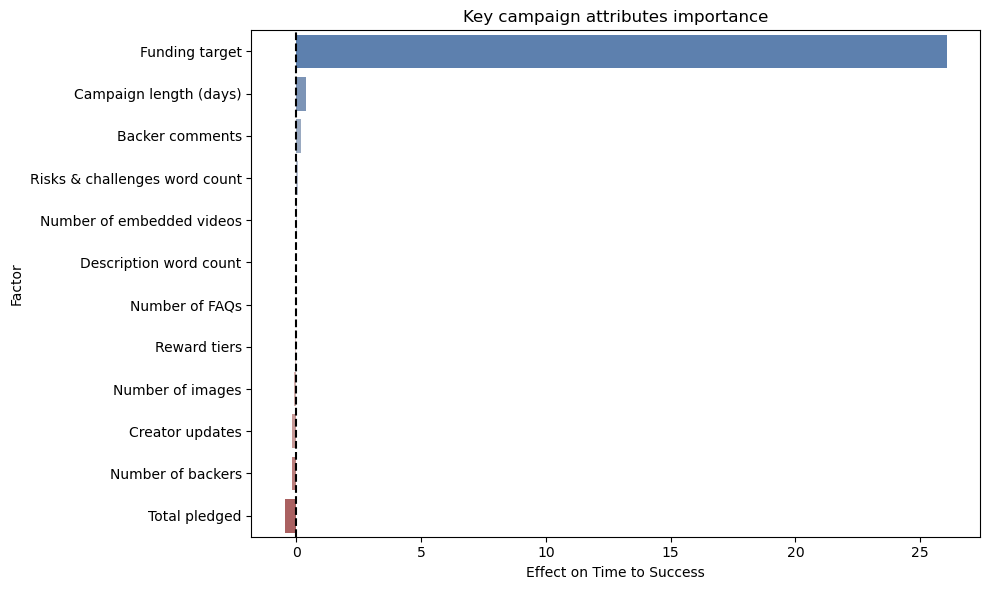

In [123]:
# Visualize

plt.figure(figsize=(10, 6))
sns.barplot(x="coef", y="Feature", data=selected_df, palette="vlag")
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Key campaign attributes importance")
plt.xlabel("Effect on Time to Success")
plt.ylabel("Factor")
plt.tight_layout()
plt.show()

/var/folders/r0/9c1jcjws6n9bdshp6xq38bnr0000gn/T/ipykernel_52269/3809541510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coef", y="Feature", data=selected_df, palette="vlag")


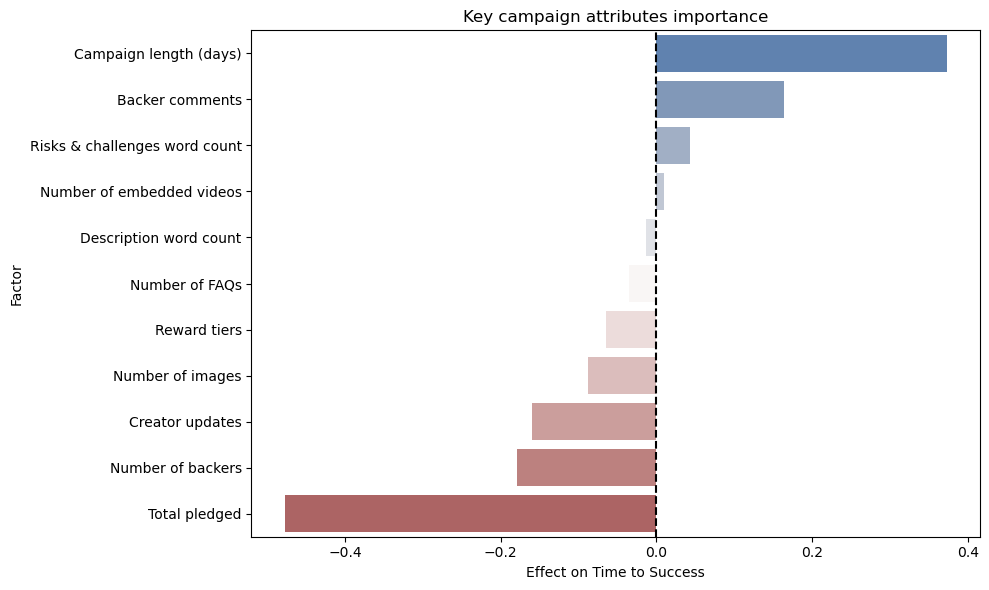

In [125]:
selected_df = selected_df.drop("goal")


plt.figure(figsize=(10, 6))
sns.barplot(x="coef", y="Feature", data=selected_df, palette="vlag")
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Key campaign attributes importance")
plt.xlabel("Effect on Time to Success")
plt.ylabel("Factor")
plt.tight_layout()
plt.show()

In [127]:
# Display
print(selected_df['coef'])

covariate
duration                      0.372828
comments                      0.163328
words_risks_and_challenges    0.042932
videos                        0.010191
words_description            -0.013250
faqs                         -0.035664
rewards                      -0.064420
images                       -0.087885
updates                      -0.159329
backers                      -0.179394
pledged                      -0.477542
Name: coef, dtype: float64
